## 1. Import the module

In [1]:
import altair as alt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    auc,
    average_precision_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## 2. Summary of the data set

Attribute Information of the dataset:

| Column name                  | Description                                  | Type       | Values                              |
| ---------------------------- | ------------------------------------------- | ----------- |  ---------------------------------- |
| Wife age                     | Wife's age                                  | Numerical   | any positive values                 |
| Wife education               | Wife's education                            | Categorical | 1=low, 2, 3, 4=high                 |
| Husband education            | Husband's education                         | Categorical | 1=low, 2, 3, 4=high                 |
| Number of children ever born | Number of children ever born                | Numerical   | any positive values                 |
| Wife religion                | Wife's religion                             | Binary      | 0=Non-Islam, 1=Islam                |
| Wife now working?            | Is wife working or not                      | Binary      | 0=Yes, 1=No                         |
| Husband occupation           | Husband's occupation                        | Categorical | 1, 2, 3, 4                          |
| Standard-of-living index     | Standard-of-living Index                    | Categorical | 1=low, 2, 3, 4=high                 |
| Media Exposure               | Media exposure                              | Binary      | 0=Good, 1=Not good                  |
| Contraceptive method used    | Contraceptive method used (Class Attribute) | Categorical | 1=No-use, 2=Long-term, 3=Short-term |


### 2.1 Read the train data

In [2]:
# Rename the column name
train_df = pd.read_csv(
    "../data/processed/train.csv"
)

train_df.head()

,Wife_age,Wife_education,Husband_education,Number_of_children_ever_born,Wife_religion,Wife_now_working?,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,41,1,4,9,1,1,2,1,0,3
1,40,4,4,6,0,0,1,4,0,2
2,40,3,3,3,1,1,2,2,1,1
3,34,4,4,3,0,1,1,2,0,1
4,47,1,4,8,1,1,3,3,0,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife_age                      1031 non-null   int64
 1   Wife_education                1031 non-null   int64
 2   Husband_education             1031 non-null   int64
 3   Number_of_children_ever_born  1031 non-null   int64
 4   Wife_religion                 1031 non-null   int64
 5   Wife_now_working?             1031 non-null   int64
 6   Husband_occupation            1031 non-null   int64
 7   Standard_of_living_index      1031 non-null   int64
 8   Media_exposure                1031 non-null   int64
 9   Contraceptive_method_used     1031 non-null   int64
dtypes: int64(10)
memory usage: 80.7 KB


In [4]:
train_df.describe()

,Wife_age,Wife_education,Husband_education,Number_of_children_ever_born,Wife_religion,Wife_now_working?,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,32.730359,2.941804,3.441319,3.335597,0.859360,0.756547,2.115422,3.132881,0.078565,1.909796
std,8.349353,1.013744,0.804236,2.412323,0.347819,0.429374,0.872039,0.969834,0.269188,0.875010
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


## 2.2 Distribution of target values

In [5]:
train_df['Contraceptive_method_used'].value_counts()

1    445
3    352
2    234
Name: Contraceptive_method_used, dtype: int64

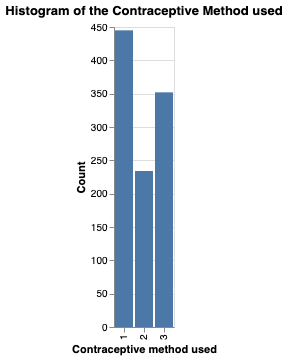

In [14]:
alt.Chart(train_df, title="Histogram of the Contraceptive Method used").mark_bar().encode(
    x=alt.X("Contraceptive_method_used", title="Contraceptive method used", type="nominal"),
    y=alt.Y("count()", title="Count"),
)

There is a class imbalance problem, but it is not necessary to immediately start our modeling plan with over- or under-sampling. We shall explore the data and create our model first.

## 3. Exploratory Data Analysis

### 3.1 Specify Numerical and Categorical Columns

In [7]:
numerical_features = ["Wife_age", "Number_of_children_ever_born"]
non_numerical_features = list(train_df.drop(columns=(numerical_features + ['Contraceptive_method_used'])).columns)

### 3.2 Plot the Histogram of all numerical features

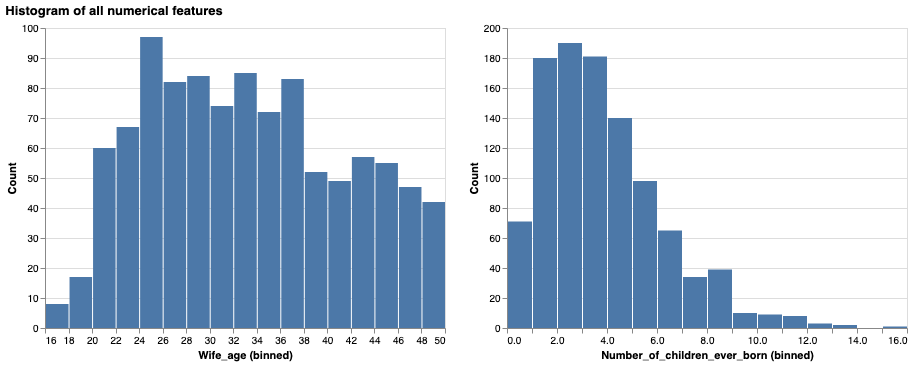

In [8]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=30)),
    y=alt.Y("count()", title="Count"),
).repeat(numerical_features, title="Histogram of all numerical features")

Two graphs are skewed to the right. This is expected as there are more young wife than old wife and most people have around two to three kids.

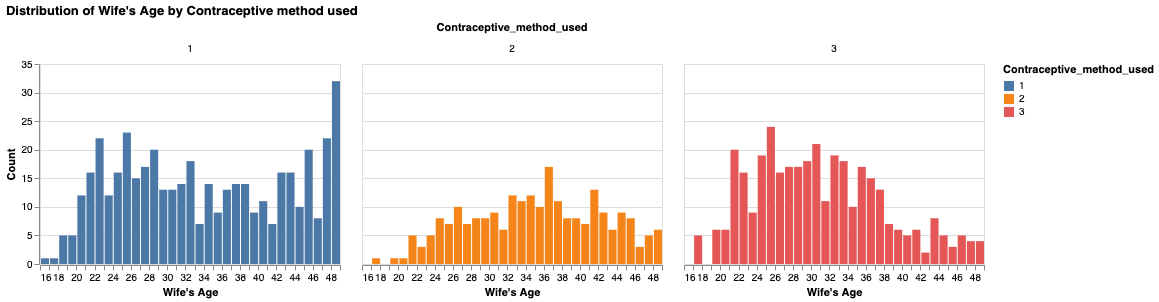

In [9]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X("Wife_age:Q", bin=alt.Bin(maxbins=40), title="Wife's Age"),
    y=alt.Y("count()", title="Count"),
    color="Contraceptive_method_used:N",
).properties(width=300, height=200).facet(
    "Contraceptive_method_used",
    title="Distribution of Wife's Age by Contraceptive method used",
)

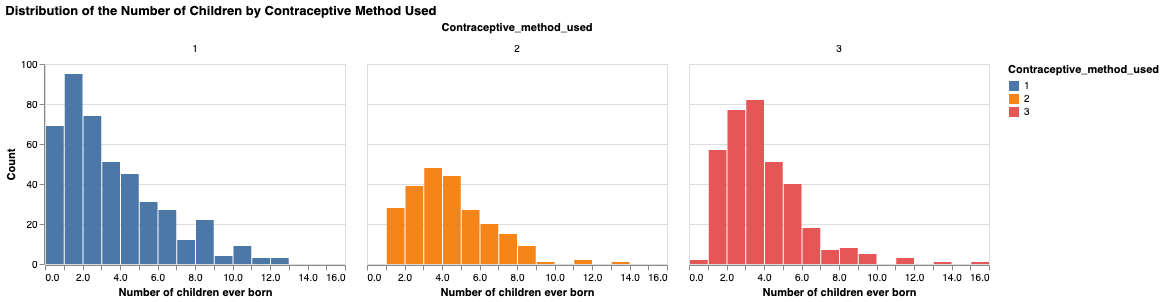

In [10]:
alt.Chart(
    train_df
).mark_bar().encode(
    x=alt.X(
        "Number_of_children_ever_born",
        title="Number of children ever born",
        bin=alt.Bin(maxbins=30),
    ),
    y=alt.Y("count()", title="Count"),
    color="Contraceptive_method_used:N",
).properties(
    width=300, height=200
).facet(
    "Contraceptive_method_used",
    title="Distribution of the Number of Children by Contraceptive Method Used"
)

### 3.3 Counting combinations of categorical features

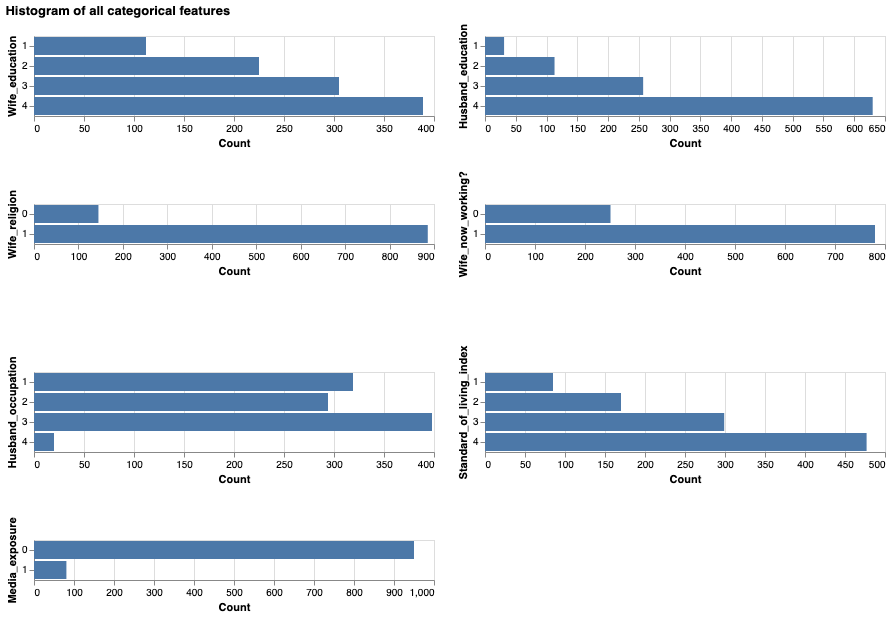

In [11]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X("count()", title="Count"),
    y=alt.Y(alt.repeat(), type="nominal"),
).repeat(non_numerical_features, columns=2, title="Histogram of all categorical features")

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='count'>

<Figure size 720x432 with 0 Axes>

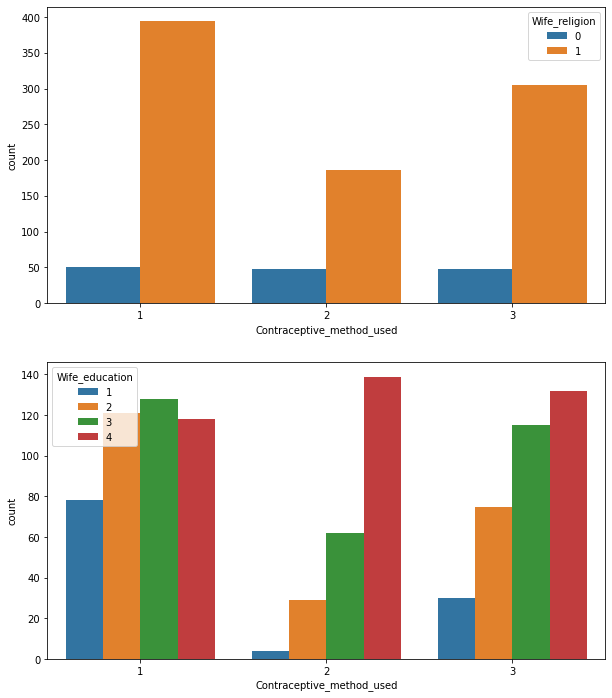

In [12]:
plt.figure(figsize=(10,6))
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
sns.countplot(x='Contraceptive_method_used',data=train_df,hue="Wife_religion", ax=axes[0])
sns.countplot(x='Contraceptive_method_used',data=train_df,hue="Wife_education", ax=axes[1])

Overall, the survey captured women with high levels of education, religious belief, educated partners and living at a high standard of living.

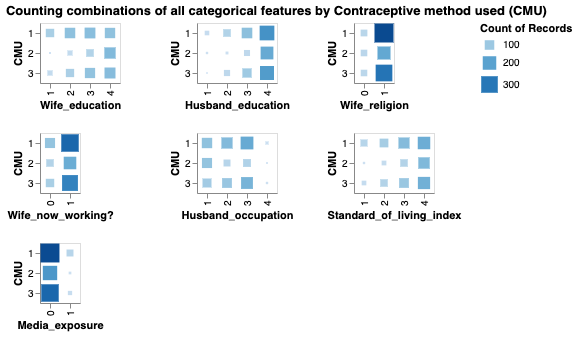

In [13]:
alt.Chart(train_df).mark_square().encode(
    x=alt.X(alt.repeat(), type="nominal"),
    y=alt.Y("Contraceptive_method_used:N", title="CMU"),
    color="count()",
    size="count()"
).repeat(
    non_numerical_features,
    columns=3,
    title="Counting combinations of all categorical features by Contraceptive method used (CMU)",
)

We spotted that most of the observation by target class 1 (no contraception) lies on certain categorical variables. But since there is class imbalance problem, we cananot imply they are correlated.